In [3]:
import math
a = 4 
b = 6 
total = a+b

pa = a/total
pb = b/total
print(pa)
print(pb)

entropy = -pa*math.log2(pa) - pb*math.log2(pb)
print(entropy)

gig_impurity = 1 - (pa**2 + pb**2)
print(gig_impurity)

0.4
0.6
0.9709505944546686
0.48


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.tree import plot_tree

data_set = sns.load_dataset('titanic')
for col in data_set.columns:
    imputer = SimpleImputer(strategy='median')

    if data_set[col].isnull().values.any():
        if data_set[col].dtype == 'int64' or data_set[col].dtype == 'float64':
            imputer = SimpleImputer(strategy='median')
            data_set[[col]] = imputer.fit_transform(data_set[[col]])
        elif data_set[col].dtype == 'object':
            imputer = SimpleImputer(strategy='most_frequent')
            data_set[[col]] = imputer.fit_transform(data_set[[col]])
# data_set.info()
data_set.head()
print(data_set.columns.tolist())
data_set.drop(['deck' , 'alive'], axis=1, inplace=True)
x = data_set.drop('survived',axis=1)
y = data_set['survived']
le = LabelEncoder()
for col in data_set.select_dtypes(include=['object', 'category']).columns:
    data_set[col] = le.fit_transform(data_set[col])


x = data_set.drop('survived', axis=1)
y = data_set['survived']


['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)

In [50]:
le = LabelEncoder()
data_set['sex'] = le.fit_transform(data_set['sex'])

le = LabelEncoder()

for col in data_set.select_dtypes(include=['object', 'category']).columns:
    data_set[col] = le.fit_transform(data_set[col])

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   class        891 non-null    int64  
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int64  
 12  alive        891 non-null    int64  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(10)
memory usage: 85.4 KB


     pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
331       1    1  45.5      0      0  28.5000         2      0    1   
733       2    1  23.0      0      0  13.0000         2      1    1   
382       3    1  32.0      0      0   7.9250         2      2    1   
704       3    1  26.0      1      0   7.8542         2      2    1   
813       3    0   6.0      4      2  31.2750         2      2    0   

     adult_male  embark_town  alone  
331        True            2   True  
733        True            2   True  
382        True            2   True  
704        True            2  False  
813       False            2  False  
[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


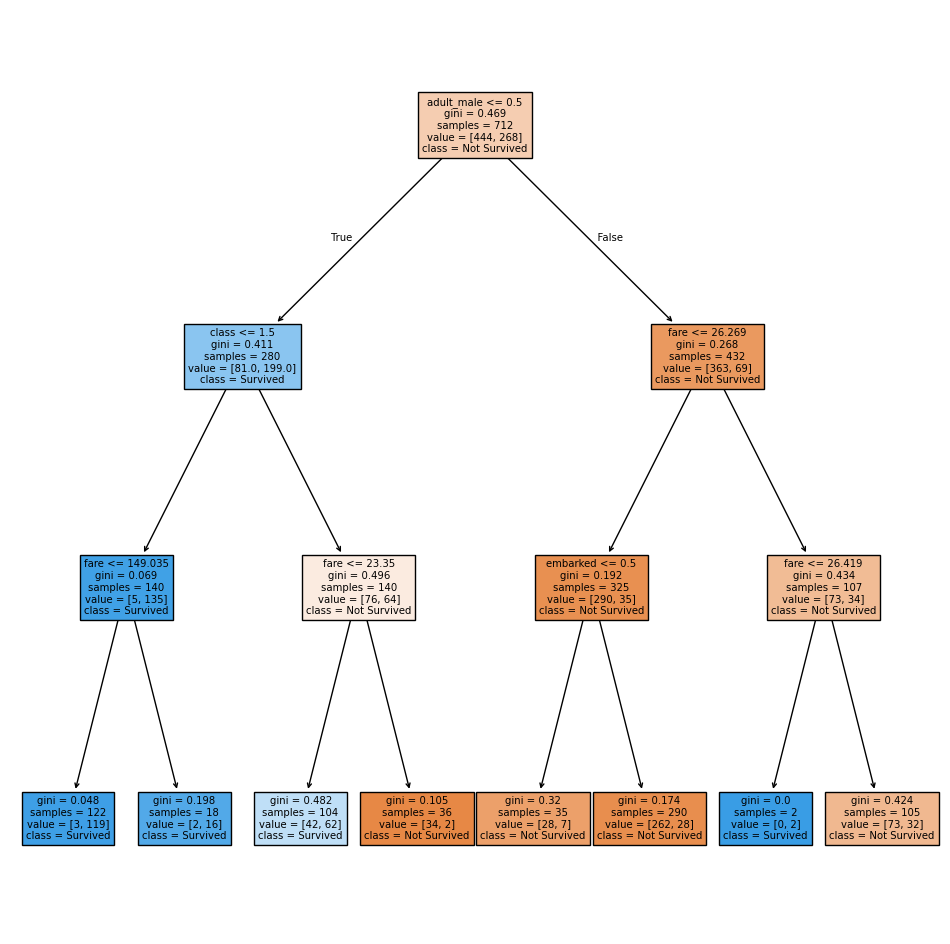

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(x_train, y_train)

print(x_train.head())

y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 12))
plot_tree(model, feature_names=x.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()



In [65]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='Decision_tree.dot', feature_names=x.columns, class_names=['Not Survived', 'Survived'], filled=True)